In [1]:
# !curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
# !python pytorch-xla-env-setup.py --apt-packages libomp5 libopenblas-dev
# import torch_xla
# import torch_xla.core.xla_model as xm

In [2]:
! pip install folium==0.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 7.4 MB/s 
  Created wheel for folium: filename=folium-0.2.1-py3-none-any.whl size=79808 sha256=5bbd09c667bb80880f70d942035ca7f0ed80a2a5dc981dc280024be442ce8837
  Stored in directory: /root/.cache/pip/wheels/9a/f0/3a/3f79a6914ff5affaf50cabad60c9f4d565283283c97f0bdccf
Successfully built folium
  Attempting uninstall: folium
    Found existing installation: folium 0.8.3
    Uninstalling folium-0.8.3:
      Successfully uninstalled folium-0.8.3


In [3]:
!pip install datasets
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 346 kB 17.4 MB/s 
     |████████████████████████████████| 86 kB 6.1 MB/s 
     |████████████████████████████████| 1.1 MB 58.4 MB/s 
     |████████████████████████████████| 86 kB 7.5 MB/s 
     |████████████████████████████████| 212 kB 66.7 MB/s 
     |████████████████████████████████| 140 kB 65.0 MB/s 
     |████████████████████████████████| 596 kB 67.4 MB/s 
     |████████████████████████████████| 127 kB 71.0 MB/s 
     |████████████████████████████████| 144 kB 50.6 MB/s 
     |████████████████████████████████| 271 kB 14.6 MB/s 
     |████████████████████████████████| 94 kB 2.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
    

# Importing Essential Libraries

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import os
import gc

import random

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

# set a seed value
torch.manual_seed(555)

from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score, accuracy_score

import transformers
from transformers import BertTokenizer, BertForSequenceClassification 
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
from transformers import AdamW

import warnings
warnings.filterwarnings("ignore")


print(torch.__version__)

1.11.0+cu113


In [5]:
!pip install hazm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 316 kB 18.6 MB/s 
     |████████████████████████████████| 233 kB 59.2 MB/s 
     |████████████████████████████████| 1.4 MB 66.0 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394487 sha256=4728a40bb1b952a4c6115a2b5383984034bed4dd326fee69f878c3b36da9ab8c
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154830 sha256=e302b5a38081068e42bee7ce68c46c78cdbda4c4760171013ec4fd552048af4f
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [6]:
!pip install cleantext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Import required packages

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

import hazm
from cleantext import clean

from tqdm.notebook import tqdm

import os
import re
import json
import copy
import collections

## Setting up the device

In [8]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
# # For TPU

# device = xm.xla_device()

# print(device)

cuda:0


# Load dataset using hugging face library

In [9]:
import pandas as pd
train_df = pd.read_excel('train.xlsx')
valid_df = pd.read_excel('valid.xlsx')
test_df = pd.read_excel('test.xlsx')

In [10]:
train_df.head()

,source,targets,category
0,"When news is brought to one of them, of (the b...",و چون یکی از آنان را به [ولادت] دختر مژده دهند...,quran
1,After them repaired Zadok the son of Immer ove...,و چون دشمنان ما شنیدند که ما آگاه شده‌ایم و خد...,bible
2,And establish regular prayers at the two ends ...,و نماز را در دو طرف روز و ساعات نخستین شب برپا...,quran
3,"And it came to pass, that, when I was come aga...",و فرمود تا مدعیانش نزد تو حاضر شوند؛ و از او ب...,bible
4,"Ah woe, that Day, to the Rejecters of Truth!",وای در آن روز بر تکذیب کنندگان!,quran


## Generating some samples

In [11]:
train_df['source'][0]

'When news is brought to one of them, of (the birth of) a female (child), his face darkens, and he is filled with inward grief!'

In [12]:
train_df['targets'][0]

'و چون یکی از آنان را به [ولادت] دختر مژده دهند [از شدت خشم] چهره\u200cاش سیاه گردد، ودرونش از غصه واندوه لبریز و آکنده شود!!'

In [13]:
len(train_df)

12600

In [14]:
train_df['category'].value_counts()

quran    4200
bible    4200
mizan    4200
Name: category, dtype: int64

In [15]:
test_df['category'].value_counts()

mizan    900
bible    900
quran    900
Name: category, dtype: int64

In [16]:
valid_df['category'].value_counts()

bible    900
quran    900
mizan    900
Name: category, dtype: int64

## Concatenating features in our dataset

In [17]:
# train_df['category'] = train_df['category'].map({'quran':0 , 'bible' : 1 , 'mizan' : 2})
# test_df['category'] = test_df['category'].map({'quran':0 , 'bible' : 1 , 'mizan' : 2})
# valid_df['category'] = valid_df['category'].map({'quran':0 , 'bible' : 1 , 'mizan' : 2})

In [18]:
train_df.head()

,source,targets,category
0,"When news is brought to one of them, of (the b...",و چون یکی از آنان را به [ولادت] دختر مژده دهند...,quran
1,After them repaired Zadok the son of Immer ove...,و چون دشمنان ما شنیدند که ما آگاه شده‌ایم و خد...,bible
2,And establish regular prayers at the two ends ...,و نماز را در دو طرف روز و ساعات نخستین شب برپا...,quran
3,"And it came to pass, that, when I was come aga...",و فرمود تا مدعیانش نزد تو حاضر شوند؛ و از او ب...,bible
4,"Ah woe, that Day, to the Rejecters of Truth!",وای در آن روز بر تکذیب کنندگان!,quran


In [19]:
test_df.head()

,source,targets,category
0,The report will cost you five hundred pounds.,اینکار برای شما ۵۰۰لیره خرج برمی دارد.,mizan
1,"And the cart came into the field of Joshua, a ...",و سموئیل تمامی خاندان اسرائیل را خطاب کرده، گف...,bible
2,"Wherefore thus saith the Holy One of Israel, B...",‌ای بنی‌اسرائیل بسوی آن کس که بر وی بینهایت عص...,bible
3,"For when for the time ye ought to be teachers,...",و این مثلی است برای زمان حاضر که بحسب آن هدایا...,bible
4,Waited for her to turn,منتظر شدم تا بچرخد,mizan


In [20]:
train_df = train_df[(train_df['source'].str.split().str.len() > 0) & (train_df['targets'].str.split().str.len() > 0)]
valid_df = valid_df[(valid_df['source'].str.split().str.len() > 0) & (valid_df['targets'].str.split().str.len() > 0)]

# ParsBERT Vocabulary

In [21]:
from transformers import BertConfig, BertTokenizer
from transformers import BertModel

from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
labels = list(sorted(train_df['category'].unique()))
labels

['bible', 'mizan', 'quran']

In [23]:
# create a key finder based on label 2 id and id to label

label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'bible': 0, 'mizan': 1, 'quran': 2}
id2label: {0: 'bible', 1: 'mizan', 2: 'quran'}


In [24]:
# setup the tokenizer and configuration
MODEL_TYPE = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = BertTokenizer.from_pretrained(MODEL_TYPE)
config = BertConfig.from_pretrained(
    MODEL_TYPE, **{
        'label2id': label2id,
        'id2label': id2label,
    })

print(config.to_json_string())

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/434 [00:00<?, ?B/s]

{
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "bible",
    "1": "mizan",
    "2": "quran"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "bible": 0,
    "mizan": 1,
    "quran": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.19.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 100000
}



In [25]:
idx = np.random.randint(0, len(train_df))
sample_comment = train_df.iloc[idx]['targets']
sample_label = train_df.iloc[idx]['category']

print(f'Sample: \n{sample_comment}\n{sample_label}')

Sample: 
سهیم بودن دو تن در ظلمات واحد، حق مدح و تمجید بو جود می‌آورد؛
mizan


In [26]:
tokens = tokenizer.tokenize(sample_comment)
token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f'  Comment: {sample_comment}')
print(f'   Tokens: {tokenizer.convert_tokens_to_string(tokens)}')
print(f'Token IDs: {token_ids}')

  Comment: سهیم بودن دو تن در ظلمات واحد، حق مدح و تمجید بو جود می‌آورد؛
   Tokens: سهیم بودن دو تن در ظلمات واحد ، حق مدح و تمجید بو جود میاورد ؛
Token IDs: [15391, 3155, 2136, 2312, 2028, 55753, 2898, 300, 2577, 26361, 331, 13918, 3885, 15449, 5934, 302]


In [27]:
encoding = tokenizer.encode_plus(
    sample_comment,
    max_length=32,
    truncation=True,
    add_special_tokens=True, # Add '[CLS]' and '[SEP]'
    return_token_type_ids=True,
    return_attention_mask=True,
    padding='max_length',
    return_tensors='pt',  # Return PyTorch tensors
)

print(f'Keys: {encoding.keys()}\n')
for k in encoding.keys():
    print(f'{k}:\n{encoding[k]}')

Keys: dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

input_ids:
tensor([[    2, 15391,  3155,  2136,  2312,  2028, 55753,  2898,   300,  2577,
         26361,   331, 13918,  3885, 15449,  5934,   302,     4,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])
token_type_ids:
tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])
attention_mask:
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])


In [28]:
class TaaghcheDataset(torch.utils.data.Dataset):
    """ Create a PyTorch dataset for Taaghche. """

    def __init__(self, tokenizer, sent1 , targets=None, label_list=None, max_len=128):
        self.sent1 = sent1
        self.targets = targets
        self.has_target = isinstance(targets, list) or isinstance(targets, np.ndarray)

        self.tokenizer = tokenizer
        self.max_len = max_len

        
        self.label_map = {label: i for i, label in enumerate(label_list)} if isinstance(label_list, list) else {}
    
    def __len__(self):
        return len(self.sent1)

    def __getitem__(self, item):
        sent1 = str(self.sent1[item])

        if self.has_target:
            target = self.label_map.get(str(self.targets[item]), str(self.targets[item]))

        encoding = self.tokenizer.encode_plus(
            sent1,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_len,
            return_token_type_ids=True,
            padding='max_length',
            return_attention_mask=True,
            return_tensors='pt')
        
        inputs = {
            'sent1': sent1,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'token_type_ids': encoding['token_type_ids'].flatten(),
        }

        if self.has_target:
            inputs['targets'] = torch.tensor(target, dtype=torch.long)
        
        return inputs


def create_data_loader(x1, y, tokenizer, max_len, batch_size, label_list):
    dataset = TaaghcheDataset(
        sent1 = x1,
        targets=y,
        tokenizer=tokenizer,
        max_len=max_len, 
        label_list=label_list)
    
    return torch.utils.data.DataLoader(dataset, batch_size=batch_size)

In [29]:
#label_list = ['negative', 'positive']
# general config
MAX_LEN = 32
TRAIN_BATCH_SIZE = 16
VALID_BATCH_SIZE = 16
TEST_BATCH_SIZE = 16

EPOCHS = 3
EEVERY_EPOCH = 788
LEARNING_RATE = 2e-5
CLIP = 0.0
OUTPUT_PATH = '/pytorch_model.bin'

os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)

train_data_loader = create_data_loader(train_df['targets'].to_numpy(), train_df['category'].to_numpy(), tokenizer, MAX_LEN, TRAIN_BATCH_SIZE, labels)
valid_data_loader = create_data_loader(valid_df['targets'].to_numpy(), valid_df['category'].to_numpy(), tokenizer, MAX_LEN, VALID_BATCH_SIZE, labels)
test_data_loader = create_data_loader(test_df['targets'].to_numpy(), None, tokenizer, MAX_LEN, TEST_BATCH_SIZE, labels)

In [30]:
import transformers
transformers.logging.set_verbosity_error()
sample_data = next(iter(train_data_loader))

print(sample_data.keys())

print(sample_data['sent1'])

print(sample_data['input_ids'].shape)
print(sample_data['input_ids'][0, :])
print(sample_data['attention_mask'].shape)
print(sample_data['attention_mask'][0, :])
print(sample_data['token_type_ids'].shape)
print(sample_data['token_type_ids'][0, :])
print(sample_data['targets'].shape)
print(sample_data['targets'][0])

dict_keys(['sent1', 'input_ids', 'attention_mask', 'token_type_ids', 'targets'])
['و چون یکی از آنان را به [ولادت] دختر مژده دهند [از شدت خشم] چهره\u200cاش سیاه گردد، ودرونش از غصه واندوه لبریز و آکنده شود!!', 'و چون دشمنان ما شنیدند که ما آگاه شده\u200cایم و خدا مشورت ایشان را باطل کرده است، آنگاه جمیع ما هر کس به\u200cکار خود به حصاربرگشتیم.', 'و نماز را در دو طرف روز و ساعات نخستین شب برپا دار، که یقینا نیکی\u200cها، بدی\u200cها را از میان می\u200cبرند، این برای یادکنندگان تذکر و یاد آوری است.', 'و فرمود تا مدعیانش نزد تو حاضر شوند؛ و از او بعد از امتحان می\u200cتوانی دانست حقیقت همه این اموری که ما براو ادعا می\u200cکنیم.»', 'وای در آن روز بر تکذیب کنندگان!', 'این مرد، بت مام معنی کلمه، یک مرد درستکار شده بود.', 'و دل من خفیه فریفته می\u200cشد و دهانم دستم را می\u200cبوسید.', 'و آوازی بلند شنیدم که از میان قدس به آن هفت فرشته می\u200cگوید که «بروید، هفت پیاله غضب خدا را بر زمین بریزید.»', 'حال شماها از پدر و مادر خودتون به رام تعریف کنید.', 'و آیا خبر مهم آن دادخواهان هنگامی که از 

In [31]:
sample_test = next(iter(test_data_loader))
print(sample_test.keys())

dict_keys(['sent1', 'input_ids', 'attention_mask', 'token_type_ids'])


In [32]:
class Textual_Entailement(nn.Module):

    def __init__(self, config):
        super(Textual_Entailement, self).__init__()

        self.bert = BertModel.from_pretrained(MODEL_TYPE,return_dict=False)
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)
    
    def forward(self, input_ids, attention_mask, token_type_ids):
        _, pooled_output = self.bert(
            input_ids=input_ids, 
            attention_mask=attention_mask, 
            token_type_ids=token_type_ids)
        
        pooled_output = self.dropout(pooled_output)
        logits = self.classifier(pooled_output)
        return logits 

In [33]:
import torch, gc

gc.collect()
torch.cuda.empty_cache()
pt_model = None

!nvidia-smi

Wed May 25 10:19:52 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8     9W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [34]:
pt_model = Textual_Entailement(config=config)
pt_model = pt_model.to(device)

print('pt_model', type(pt_model))

Downloading:   0%|          | 0.00/624M [00:00<?, ?B/s]

pt_model <class '__main__.Textual_Entailement'>


In [35]:
# sample data output

sample_data_sent1 = sample_data['sent1']
sample_data_input_ids = sample_data['input_ids']
sample_data_attention_mask = sample_data['attention_mask']
sample_data_token_type_ids = sample_data['token_type_ids']
sample_data_targets = sample_data['targets']

# available for using in GPU
sample_data_input_ids = sample_data_input_ids.to(device)
sample_data_attention_mask = sample_data_attention_mask.to(device)
sample_data_token_type_ids = sample_data_token_type_ids.to(device)
sample_data_targets = sample_data_targets.to(device)


# outputs = F.softmax(
#     pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids), 
#     dim=1)

outputs = pt_model(sample_data_input_ids, sample_data_attention_mask, sample_data_token_type_ids)
_, preds = torch.max(outputs, dim=1)

print(outputs[:5, :])
print(preds[:5])

tensor([[ 0.4857, -0.0118, -0.1633],
        [ 0.3256, -0.0208, -0.3946],
        [ 0.2445,  0.0443,  0.0585],
        [ 0.2689,  0.0485, -0.2050],
        [ 0.2948, -0.0160,  0.0124]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([0, 0, 0, 0, 0], device='cuda:0')


In [36]:
def simple_accuracy(y_true, y_pred):
    return (y_true == y_pred).mean()

def acc_and_f1(y_true, y_pred, average='weighted'):
    acc = simple_accuracy(y_true, y_pred)
    f1 = f1_score(y_true=y_true, y_pred=y_pred, average=average)
    return {
        "acc": acc,
        "f1": f1,
    }

def y_loss(y_true, y_pred, losses):
    y_true = torch.stack(y_true).cpu().detach().numpy()
    y_pred = torch.stack(y_pred).cpu().detach().numpy()
    y = [y_true, y_pred]
    loss = np.mean(losses)

    return y, loss


def eval_op(model, data_loader, loss_fn):
    model.eval()

    losses = []
    y_pred = []
    y_true = []

    with torch.no_grad():
        for dl in tqdm(data_loader, total=len(data_loader), desc="Evaluation... "):
            
            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']
            targets = dl['targets']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            targets = targets.to(device)

            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)
            
            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            # calculate the batch loss
            loss = loss_fn(outputs, targets)

            # accumulate all the losses
            losses.append(loss.item())

            y_pred.extend(preds)
            y_true.extend(targets)
    
    eval_y, eval_loss = y_loss(y_true, y_pred, losses)
    return eval_y, eval_loss


def train_op(model, 
             data_loader, 
             loss_fn, 
             optimizer, 
             scheduler, 
             step=0, 
             print_every_step=100, 
             eval=False,
             eval_cb=None,
             eval_loss_min=np.Inf,
             eval_data_loader=None, 
             clip=0.0):
    
    model.train()

    losses = []
    y_pred = []
    y_true = []

    for dl in tqdm(data_loader, total=len(data_loader), desc="Training... "):
        step += 1

        input_ids = dl['input_ids']
        attention_mask = dl['attention_mask']
        token_type_ids = dl['token_type_ids']
        targets = dl['targets']

        # move tensors to GPU if CUDA is available
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        token_type_ids = token_type_ids.to(device)
        targets = targets.to(device)

        # clear the gradients of all optimized variables
        optimizer.zero_grad()

        # compute predicted outputs by passing inputs to the model
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids)
        
        # convert output probabilities to predicted class
        _, preds = torch.max(outputs, dim=1)

        # calculate the batch loss
        loss = loss_fn(outputs, targets)

        # accumulate all the losses
        losses.append(loss.item())

        # compute gradient of the loss with respect to model parameters
        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        if clip > 0.0:
            nn.utils.clip_grad_norm_(model.parameters(), max_norm=clip)

        # perform optimization step
        optimizer.step()

        # perform scheduler step
        scheduler.step()

        y_pred.extend(preds)
        y_true.extend(targets)

        if eval:
            train_y, train_loss = y_loss(y_true, y_pred, losses)
            train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')

            if step % print_every_step == 0:
                eval_y, eval_loss = eval_op(model, eval_data_loader, loss_fn)
                eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')

                if hasattr(eval_cb, '__call__'):
                    eval_loss_min = eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min)

    train_y, train_loss = y_loss(y_true, y_pred, losses)

    return train_y, train_loss, step, eval_loss_min

In [37]:
optimizer = AdamW(pt_model.parameters(), lr=LEARNING_RATE, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss()

step = 0
eval_loss_min = np.Inf
history = collections.defaultdict(list)


def eval_callback(epoch, epochs, output_path):
    def eval_cb(model, step, train_score, train_loss, eval_score, eval_loss, eval_loss_min):
        statement = ''
        statement += 'Epoch: {}/{}...'.format(epoch, epochs)
        statement += 'Step: {}...'.format(step)
        
        statement += 'Train Loss: {:.6f}...'.format(train_loss)
        statement += 'Train Acc: {:.3f}...'.format(train_score['acc'])

        statement += 'Valid Loss: {:.6f}...'.format(eval_loss)
        statement += 'Valid Acc: {:.3f}...'.format(eval_score['acc'])

        print(statement)

        if eval_loss <= eval_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                eval_loss_min,
                eval_loss))
            
            torch.save(model.state_dict(), output_path)
            eval_loss_min = eval_loss
        
        return eval_loss_min


    return eval_cb


for epoch in tqdm(range(1, EPOCHS + 1), desc="Epochs... "):
    train_y, train_loss, step, eval_loss_min = train_op(
        model=pt_model, 
        data_loader=train_data_loader, 
        loss_fn=loss_fn, 
        optimizer=optimizer, 
        scheduler=scheduler, 
        step=step, 
        print_every_step=EEVERY_EPOCH, 
        eval=True,
        eval_cb = eval_callback(epoch, EPOCHS, OUTPUT_PATH),
        eval_loss_min=eval_loss_min,
        eval_data_loader=valid_data_loader, 
        clip=CLIP)
    
    train_score = acc_and_f1(train_y[0], train_y[1], average='weighted')
    
    eval_y, eval_loss = eval_op(
        model=pt_model, 
        data_loader=valid_data_loader, 
        loss_fn=loss_fn)
    
    eval_score = acc_and_f1(eval_y[0], eval_y[1], average='weighted')
    
    history['train_acc'].append(train_score['acc'])
    history['train_loss'].append(train_loss)
    history['val_acc'].append(eval_score['acc'])
    history['val_loss'].append(eval_loss)

Epochs... :   0%|          | 0/3 [00:00<?, ?it/s]

Training... :   0%|          | 0/788 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/169 [00:00<?, ?it/s]

Epoch: 1/3...Step: 788...Train Loss: 0.155857...Train Acc: 0.943...Valid Loss: 0.072285...Valid Acc: 0.973...
Validation loss decreased (inf --> 0.072285).  Saving model ...


Evaluation... :   0%|          | 0/169 [00:00<?, ?it/s]

Training... :   0%|          | 0/788 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/169 [00:00<?, ?it/s]

Epoch: 2/3...Step: 1576...Train Loss: 0.021465...Train Acc: 0.993...Valid Loss: 0.077117...Valid Acc: 0.975...


Evaluation... :   0%|          | 0/169 [00:00<?, ?it/s]

Training... :   0%|          | 0/788 [00:00<?, ?it/s]

Evaluation... :   0%|          | 0/169 [00:00<?, ?it/s]

Epoch: 3/3...Step: 2364...Train Loss: 0.004038...Train Acc: 0.999...Valid Loss: 0.082153...Valid Acc: 0.975...


Evaluation... :   0%|          | 0/169 [00:00<?, ?it/s]

In [38]:
def predict(model, sent1, tokenizer, max_len=128, batch_size=32):
    data_loader = create_data_loader(sent1, None, tokenizer, max_len, batch_size, None)
    
    predictions = []
    prediction_probs = []

    
    model.eval()
    with torch.no_grad():
        for dl in tqdm(data_loader, position=0):
            input_ids = dl['input_ids']
            attention_mask = dl['attention_mask']
            token_type_ids = dl['token_type_ids']

            # move tensors to GPU if CUDA is available
            input_ids = input_ids.to(device)
            attention_mask = attention_mask.to(device)
            token_type_ids = token_type_ids.to(device)
            
            # compute predicted outputs by passing inputs to the model
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                token_type_ids=token_type_ids)
            
            # convert output probabilities to predicted class
            _, preds = torch.max(outputs, dim=1)

            predictions.extend(preds)
            prediction_probs.extend(F.softmax(outputs, dim=1))

    predictions = torch.stack(predictions).cpu().detach().numpy()
    prediction_probs = torch.stack(prediction_probs).cpu().detach().numpy()

    return predictions, prediction_probs

In [39]:
test_sent1 = test_df['targets'].to_numpy()
preds, probs = predict(pt_model, test_sent1, tokenizer, max_len=32)

print(preds.shape, probs.shape)

  0%|          | 0/85 [00:00<?, ?it/s]

(2700,) (2700, 3)


In [45]:
probs

array([[1.6039739e-04, 9.9970990e-01, 1.2970810e-04],
       [9.9970728e-01, 1.1518021e-04, 1.7761067e-04],
       [9.9963093e-01, 2.7519450e-04, 9.3868570e-05],
       ...,
       [9.8997436e-05, 4.9335253e-05, 9.9985158e-01],
       [1.5673912e-04, 9.9945492e-01, 3.8831757e-04],
       [9.9961144e-01, 2.5615757e-04, 1.3234555e-04]], dtype=float32)

In [40]:
y_test, y_pred = [labels.index(label) for label in test_df['category'].values], preds

print(f'F1: {f1_score(y_test, y_pred, average="weighted")}')
print()
print(classification_report(y_test, y_pred, target_names=labels))

F1: 0.9737040075706846

              precision    recall  f1-score   support

       bible       0.97      0.98      0.98       900
       mizan       0.97      0.97      0.97       900
       quran       0.98      0.97      0.97       900

    accuracy                           0.97      2700
   macro avg       0.97      0.97      0.97      2700
weighted avg       0.97      0.97      0.97      2700



# AUC

In [42]:
nb_classes = 3
one_hot_targets = np.eye(nb_classes)[np.array(y_test).reshape(-1,1)]
one_hot_targets.reshape((len(y_test),-1))

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [46]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
roc_auc_score(one_hot_targets.reshape((len(y_test),-1)), probs, multi_class='ovo', average='weighted')#, labels=['quran' , 'bible'  , 'mizan'])

0.9982576131687242

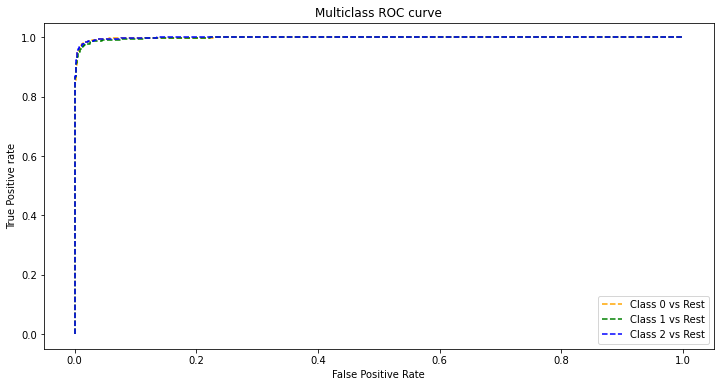

In [50]:
from IPython.core.pylabtools import figsize
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probs[:,i], pos_label=i)
    
# plotting 
plt.figure(figsize=(12,6))   
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [51]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [53]:
model_save_name = 'model_mono_lingual_ParsBERT.pt'
path = F'/content/gdrive/MyDrive/Colab Notebooks/NLP(Faili)/CA#4/Trained_Models/{model_save_name}'
torch.save(pt_model.state_dict(), path)